# Getting Started With `riweather`

In [1]:
import matplotlib.pyplot as plt

import riweather

%matplotlib inline

Suppose you need weather data at a certain site. To list all weather stations in order of their distance to that site, use [`riweather.rank_stations()`][riweather.rank_stations].

In [2]:
my_lat, my_lon = 39.98, -105.13
ranked_stations = riweather.rank_stations(my_lat, my_lon)

In [3]:
print("Number of stations returned:", ranked_stations.shape[0])
ranked_stations.head()

Number of stations returned: 2851


,name,distance,latitude,longitude,years,quality
usaf_id,,,,,,
720534,ERIE MUNICIPAL AIRPORT,7971.794695,40.017,-105.050,"[2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...","[low, high, high, high, high, high, high, high..."
724699,ATCT ROCKY MOUNTAIN METRO,8951.899139,39.900,-105.117,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...","[medium, medium, medium, medium, high, high, h..."
720533,BOULDER MUNICIPAL AIRPORT,9477.070760,40.033,-105.217,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[medium, high, high, high, high, high, high, h..."
720538,VANCE BRAND AIRPORT,21002.247034,40.167,-105.167,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[low, high, high, high, high, high, high, high..."
725650,DENVER INTERNATIONAL AIRPORT,43134.270016,39.847,-104.656,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...","[high, high, high, high, high, high, high, hig..."


This gives us the name and USAF identifiers of all ISD weather stations in the United States, along with their latitudes and longitudes and their distances (in meters) to the target site. The "years" column is a list of years for which there is available weather data from that station. The "sizes" column is the sizes (in bytes) of the data file for the corresponding year---this is a pretty good indicator of the data quality you can expect from the station, since a larger file means more observations.

You probably don't want all three thousand weather stations that are returned, so let's be more efficient and limit our search to stations that have data for 2022 and stations that are within 20 km.

In [4]:
ranked_stations = riweather.rank_stations(
    my_lat,
    my_lon,
    year=2022,
    max_distance_m=20000,
)
ranked_stations

,name,distance,latitude,longitude,years,quality
usaf_id,,,,,,
720534,ERIE MUNICIPAL AIRPORT,7971.794695,40.017,-105.050,"[2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...","[low, high, high, high, high, high, high, high..."
724699,ATCT ROCKY MOUNTAIN METRO,8951.899139,39.900,-105.117,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...","[medium, medium, medium, medium, high, high, h..."
720533,BOULDER MUNICIPAL AIRPORT,9477.070760,40.033,-105.217,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[medium, high, high, high, high, high, high, h..."


Select the closest station, Erie Municipal Airport, using [`riweather.select_station()`][riweather.select_station].

In [5]:
station = riweather.select_station(ranked_stations, rank=0)
station

Station("720534")

Now we can use the [`Station.fetch_temp_data()`][riweather.Station.fetch_temp_data] method to get temperature data in degrees Fahrenheit.

In [6]:
ts = station.fetch_temp_data(2022, value="temperature", scale="F")
ts.head()

2022-01-01 00:00:00+00:00    24.2620
2022-01-01 01:00:00+00:00    20.1995
2022-01-01 02:00:00+00:00    17.9525
2022-01-01 03:00:00+00:00    16.7690
2022-01-01 04:00:00+00:00    16.3715
Freq: H, Name: tempF, dtype: float64

It's important to note that **the timestamps are always in UTC**. The temperature data is hourly by default, but `riweather` can resample it to a different frequency as well.

In [7]:
ts_30min = station.fetch_temp_data(
    2022,
    value="temperature",
    scale="F",
    period="30min",
)
ts_30min.head()

2022-01-01 00:00:00+00:00    26.0780
2022-01-01 00:30:00+00:00    23.3540
2022-01-01 01:00:00+00:00    21.0470
2022-01-01 01:30:00+00:00    19.3520
2022-01-01 02:00:00+00:00    18.2975
Freq: 30T, Name: tempF, dtype: float64

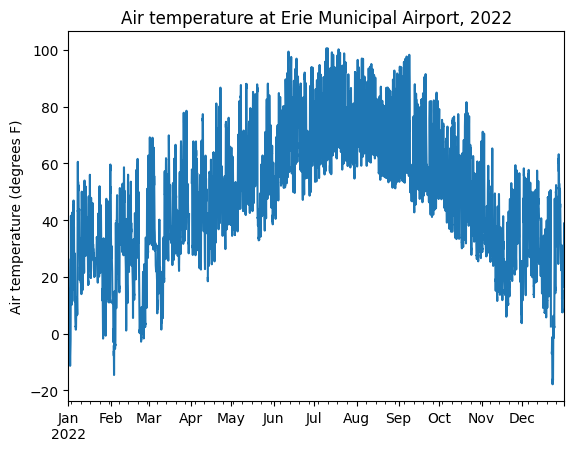

In [8]:
ts_30min.plot(
    title=f"Air temperature at {station.name.title()}, 2022",
    ylabel="Air temperature (degrees F)",
)
plt.show()

We can verify the location of our site and the nearest weather stations by plotting them on a map with [`riweather.plot_stations()`][riweather.plot_stations].

In [9]:
riweather.plot_stations(my_lat, my_lon, ranked_stations, distance_unit="mi")

Only have a ZIP code for your site and not a precise latitude and longitude? No problem. You can use [`riweather.zcta_to_lat_lon()`][riweather.zcta_to_lat_lon] to get an approximate location.

In [10]:
my_lat, my_lon = riweather.zcta_to_lat_lon("80027")
print(f"{my_lat:.3f}", f"{my_lon:.3f}")

39.951 -105.164


In [11]:
ranked_stations = riweather.rank_stations(my_lat, my_lon, max_distance_m=20000)
riweather.plot_stations(my_lat, my_lon, ranked_stations, distance_unit="mi")